# Predicting Heart Disease Diagnosis with Health Markers

### Introduction:

Heart disease is a major worldwide health concern because it is a common and potentially fatal disorder. To better understand, diagnose, and forecast heart illnesses, academics and healthcare practitioners are utilizing data-driven approaches thanks to technological advancements and the growing availability of health-related statistics. The UCI heart disease dataset stands as a valuable resource in this pursuit, offering a comprehensive set of attributes that can be analyzed to uncover patterns and insights related to cardiovascular health. The primary objective of this project is to address the question: "Can we predict heart disease diagnoses based on health markers?" using the UCI heart disease data set.

The data set includes many observations of individuals admitted to  a Cleveland hospital with 14 variables, the five relevant to our preliminary analysis are:
1) chol: serum cholestoral	(mg/dl)
2) trest_bps: resting blood pressure (on admission to the hospital)	(mm Hg)
3) thalach: maximum heart rate achieved (bpm)
4) age: age of patient (years)
5) num: diagnosis of heart disease (0 is no presence. 1,2,3,4 is stage of heart disease)

### Preliminary exploratory data analysis:

First let's load the load all the nessecary packages and the data set with column names.

In [58]:
library(tidyverse)
library(repr)
library(tidymodels)

heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
        col_names=c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
head(heart_disease)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


The data is almost tidy, however NA values are specified as "?" in this data set so let's convert them to NA.

In [59]:
heart_disease[heart_disease=="?"] <- NA

Now the data is tidy. Before we specify our training and testing data, let's standardize the relevant variables and create another variable that classifies the observation as either being diagnosed with heart disease or not without the range which will be easier to visualize.

In [60]:
heart_disease <- mutate(heart_disease, diagn=ifelse(is.na(num), NA, ifelse((num>0), "yes", "no")),
                                       diagn=as_factor(diagn),
                                       num=as_factor(num),
                                       chol_standardized = scale(chol, center=TRUE),
                                       trestbps_standardized = scale(trestbps, center=TRUE), 
                                       age_standardized = scale(age, center=TRUE),
                                       thalch_standardized = scale(thalach, center=TRUE))
head(heart_disease)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagn,chol_standardized,trestbps_standardized,age_standardized,thalch_standardized
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,no,-0.26446281,0.75627397,0.9471596,0.01716893
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,yes,0.75915934,1.60855891,1.3897030,-1.81889638
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,yes,-0.34171732,-0.66420094,1.3897030,-0.90086373
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,no,0.06386882,-0.09601098,-1.9293722,1.63465503
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,no,-0.82455796,-0.09601098,-1.4868288,0.97891742
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,no,-0.20652194,-0.66420094,0.1727088,1.24121247


Now let's specify our training and testing data sets.

In [61]:
heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = diagn)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

Now that we have our training data set, let's see the count of observations with heart disease and without to see if we will need to balance our data in the future.

In [62]:
heart_disease_count <- heart_disease_train |>
    group_by(diagn) |>
    summarize(count=n())

heart_disease_stage_count <- heart_disease_train |>
    group_by(num) |>
    summarize(count=n())

heart_disease_count
heart_disease_stage_count

diagn,count
<fct>,<int>
no,123
yes,104


num,count
<fct>,<int>
0,123
1,39
2,28
3,30
4,7


Now let's create a few scatter plots of our testing data coloured by heart disease which could be useful when solving future classifications problem.

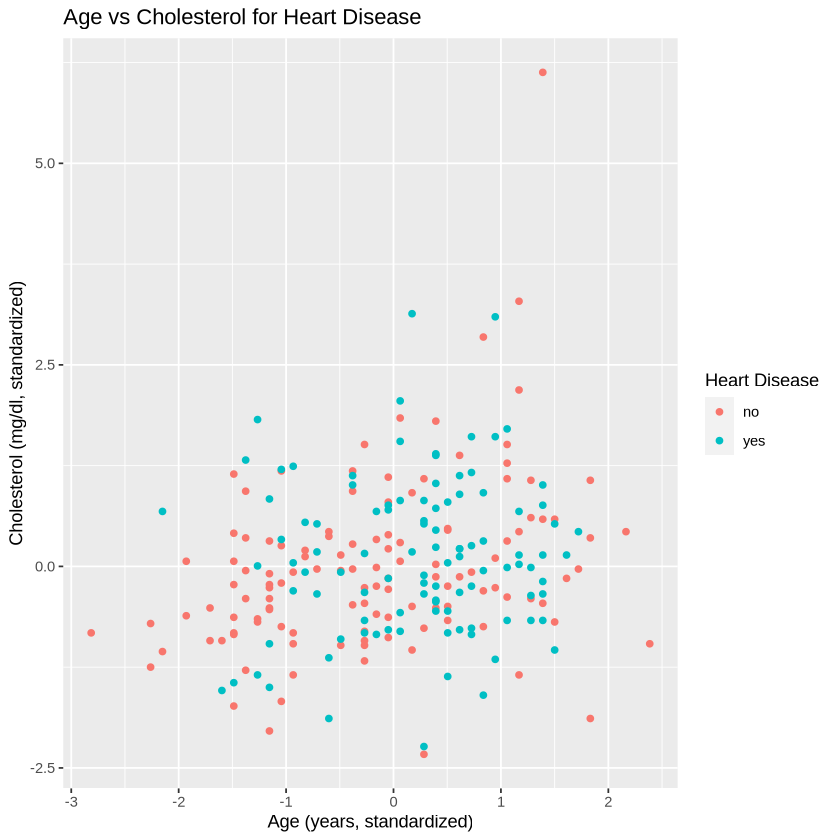

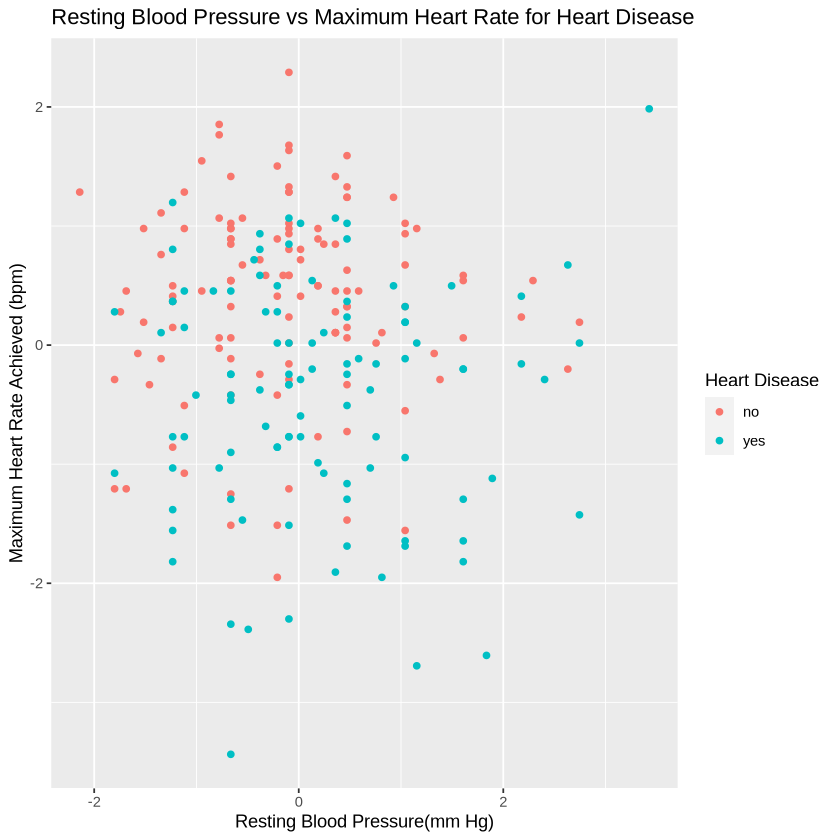

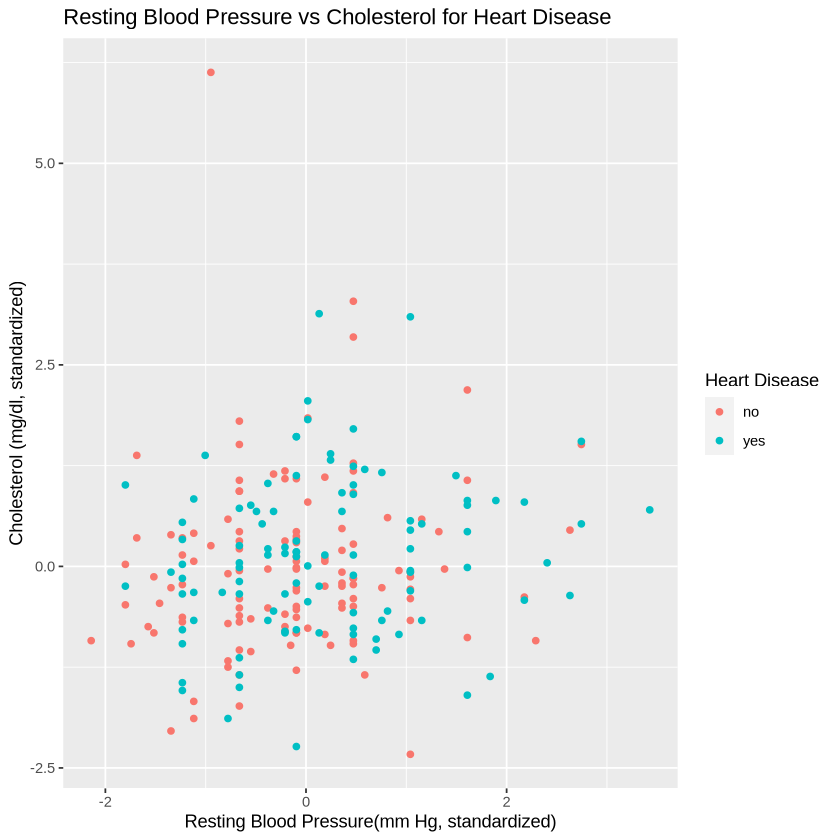

In [63]:
age_vs_chol <- ggplot(heart_disease_train, aes(x=age_standardized, y=chol_standardized, color=diagn)) +
    geom_point() +
    labs(x="Age (years, standardized)", y="Cholesterol (mg/dl, standardized)", color="Heart Disease", title="Age vs Cholesterol for Heart Disease")

trestbps_vs_thalch <- ggplot(heart_disease_train, aes(x=trestbps_standardized, y=thalch_standardized, color=diagn)) +
    geom_point() +
    labs(x="Resting Blood Pressure(mm Hg)", y="Maximum Heart Rate Achieved (bpm)", color="Heart Disease", title="Resting Blood Pressure vs Maximum Heart Rate for Heart Disease")

trestbps_vs_chol <- ggplot(heart_disease_train, aes(x=trestbps_standardized, y=chol_standardized, color=diagn)) +
    geom_point() +
    labs(x="Resting Blood Pressure(mm Hg, standardized)", y="Cholesterol (mg/dl, standardized)", color="Heart Disease", title="Resting Blood Pressure vs Cholesterol for Heart Disease")

age_vs_chol
trestbps_vs_thalch
trestbps_vs_chol

### Methods:

We will conduct our data analysis using the k-nearest neighbors classification algorithmn in order to classify new patient observations as either having heart disease or not. We will first split the data into training and test data sets. Next we will choose the number of neighbors in our K-nearest neighbors classifier by maximizing estimated cross-validation accuracy. Then we will we perform the K-nearest neighbors classification using tidymodels. The variables we will use for this classification problem will be cholesterol, resting blood pressure, maximum heart rate achieved, and age as they are all health markers that are relavent to our question. One way we will visualize our results will be through at least one scatter plot with two relavent variables on the x and y axes with each point coloured based on our classifier (heart disease diagnosis) as well as a new observation point.

### Expected outcomes and significance:

We expect to find that observations with traditional indicators of poor health will be more likely to be classified as having heart disease. For example, a person admitted with high cholesterol, high blood pressure, at an older age will most likely be diagnosed with heart disease. In the future these findings could potentially help doctors predict the likelyhood of a heart disease diagnosis in a patient which they could use to take appropriate health tests and mearsures which could increase healthcare effectiveness and efficiency. This project could potentially lead to questions regarding risk factor analysis if we find that a varable is of greater/less importance that what was previously thought. For example, if we find that patients with high cholesterol are not generally diagnosed with heart disease this could lead to a reevaluation of cholesterol's relative impact on heart disease .

### Sources

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.